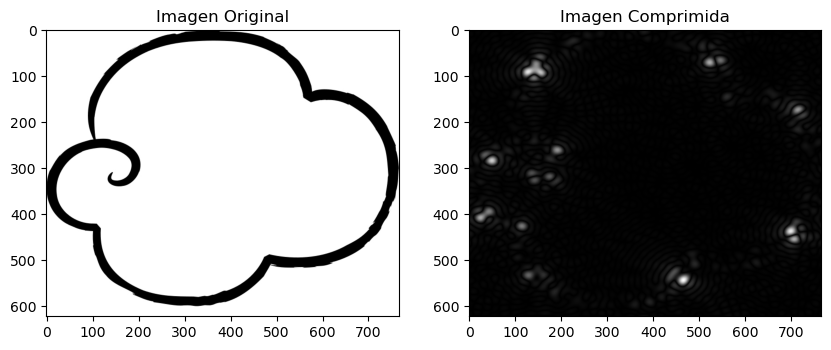

In [22]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def load_image(path):
    """Carga la imagen y la convierte a escala de grises."""
    image = Image.open(path).convert('L')  # Convertir a escala de grises
    image_array = np.array(image)
    return image_array

def apply_fourier_transform(image_array):
    """Aplica la Transformada de Fourier a la imagen."""
    return np.fft.fft2(image_array)

def apply_filter(fourier_transform, threshold):
    """Aplica un filtro de frecuencias para la compresión."""
    rows, cols = fourier_transform.shape
    crow, ccol = rows // 2, cols // 2  # Centro de la imagen

    # Crear una máscara de filtro
    mask = np.zeros((rows, cols), np.uint8)
    r = threshold  # Radio del filtro
    center = [crow, ccol]

    # Crear la máscara circular
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i - center[0])**2 + (j - center[1])**2) < r:
                mask[i, j] = 1

    # Aplicar la máscara
    filtered_transform = fourier_transform * mask
    return filtered_transform

def apply_inverse_fourier_transform(filtered_transform):
    """Aplica la Transformada Inversa de Fourier para reconstruir la imagen."""
    inverse_transform = np.fft.ifft2(filtered_transform)
    return np.abs(inverse_transform)

def save_image(image_array, path):
    """Guarda la imagen en el disco."""
    image_pil = Image.fromarray(np.uint8(image_array))
    image_pil.save(path)

def main():
    # Ruta de la imagen original
    input_path = r'C:\Users\seanz\Anaconda\nube\imagen.jpg'
    output_path = r'C:\Users\seanz\Anaconda\nube\imagen_comprimida.jpg'
    
    # Parámetro del filtro
    threshold = 30  # Puedes ajustar este umbral
    
    # Procesamiento de la imagen
    image_array = load_image(input_path)
    fourier_transform = apply_fourier_transform(image_array)
    filtered_transform = apply_filter(fourier_transform, threshold)
    compressed_image_array = apply_inverse_fourier_transform(filtered_transform)
    
    # Guardar y mostrar la imagen
    save_image(compressed_image_array, output_path)
    
    # Mostrar las imágenes
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Imagen Original')
    plt.imshow(image_array, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title('Imagen Comprimida')
    plt.imshow(compressed_image_array, cmap='gray')

    plt.show()

if __name__ == '__main__':
    main()


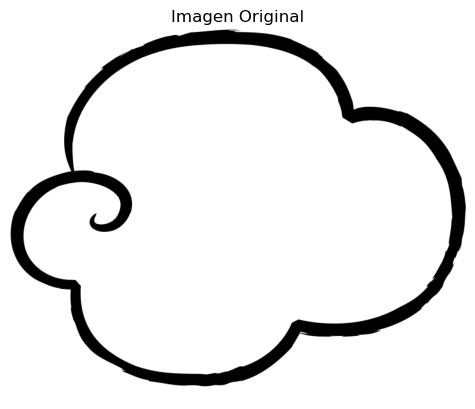

In [20]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def load_image(path):
    """
    Carga una imagen desde el disco y la convierte a escala de grises.

    Args:
        path (str): Ruta del archivo de imagen.

    Returns:
        np.ndarray: Array NumPy que representa la imagen en escala de grises.
    """
    image = Image.open(path)
    image_gray = image.convert('L')
    image_array = np.array(image_gray)
    return image_array

def show_image(image_array, title="Imagen"):
    """
    Muestra una imagen usando matplotlib.

    Args:
        image_array (np.ndarray): Array NumPy que representa la imagen.
        title (str): Título para la imagen mostrada.
    """
    plt.imshow(image_array, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Ruta del archivo de imagen
input_path = r'C:\Users\seanz\Anaconda\nube\imagen.jpg'

# Cargar y mostrar la imagen
image_array = load_image(input_path)
show_image(image_array, title="Imagen Original")


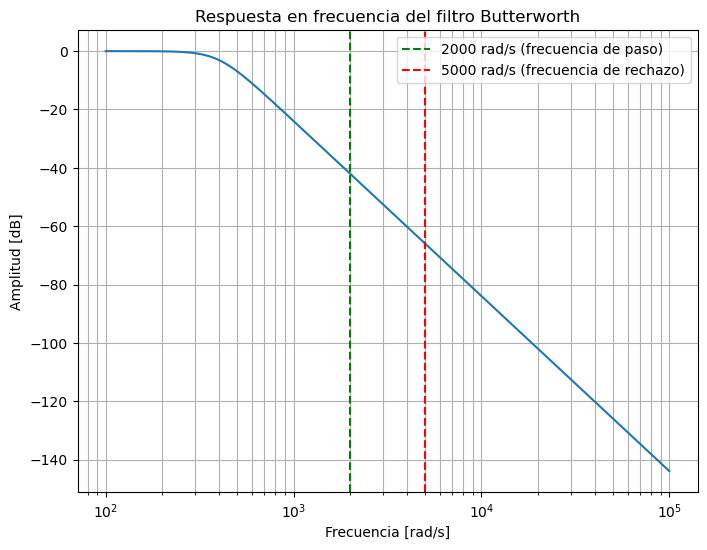

In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Especificaciones del filtro
wp = 2000  # Frecuencia de paso en rad/s
ws = 5000  # Frecuencia de corte en rad/s
Rp = 1     # Atenuación máxima en la banda de paso (dB)
Rs = 15    # Atenuación mínima en la banda de rechazo (dB)

# Convertir frecuencias a Hz
wp_hz = wp / (2 * np.pi)
ws_hz = ws / (2 * np.pi)

# Diseño del filtro Butterworth
n, wc = signal.buttord(wp_hz, ws_hz, Rp, Rs, analog=True)
b, a = signal.butter(n, wc, btype='low', analog=True)

# Crear una respuesta de frecuencia para visualizar
w, h = signal.freqs(b, a, worN=np.logspace(2, 5, 500))

# Graficar la respuesta en magnitud
plt.figure(figsize=(8, 6))
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Respuesta en frecuencia del filtro Butterworth')
plt.xlabel('Frecuencia [rad/s]')
plt.ylabel('Amplitud [dB]')
plt.grid(which='both', axis='both')
plt.axvline(wp, color='green', linestyle='--', label=f'{wp} rad/s (frecuencia de paso)')
plt.axvline(ws, color='red', linestyle='--', label=f'{ws} rad/s (frecuencia de rechazo)')
plt.legend()
plt.show()